In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Read Data

In [2]:
url = 'https://raw.githubusercontent.com/jarif87/DataSets/main/game_data.csv'
df=pd.read_csv(url)
df.head()

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


In [3]:
df.shape

(8, 5)

In [4]:
df.describe()

,Days
count,8.00000
mean,4.50000
std,2.44949
min,1.00000
25%,2.75000
50%,4.50000
75%,6.25000
max,8.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Days          8 non-null      int64 
 1   Outlook       8 non-null      object
 2   Temprature    8 non-null      object
 3   Routine       8 non-null      object
 4   Wear Jacket?  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 448.0+ bytes


In [6]:
df.isnull().sum()

Days            0
Outlook         0
Temprature      0
Routine         0
Wear Jacket?    0
dtype: int64

In [7]:
df.drop("Days",axis=1,inplace=True)

In [8]:
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


In [9]:
label_encoder = LabelEncoder()
col = ["Outlook", "Temprature", "Routine"]
for x in col:
    df[x]=label_encoder.fit_transform(df[x])

In [10]:
label_encoder.fit(["No","Yes"])
df["Wear Jacket?"] = label_encoder.transform(df["Wear Jacket?"])

In [11]:
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,1,0,0,0
1,0,0,0,1
2,0,1,1,0
3,1,0,1,1
4,0,0,1,1


In [12]:
train_data=df[["Outlook","Temprature","Routine"]]
label_data=df["Wear Jacket?"]

In [13]:
ds_classifier=DecisionTreeClassifier()

In [14]:
ds_classifier.fit(train_data,label_data)

DecisionTreeClassifier()

In [15]:
final_pred=ds_classifier.predict([[1,0,0]]).astype(bool)
final_pred

array([False])

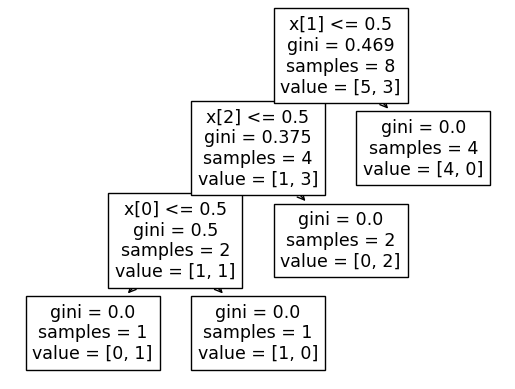

In [16]:
tree.plot_tree(ds_classifier)
plt.show()

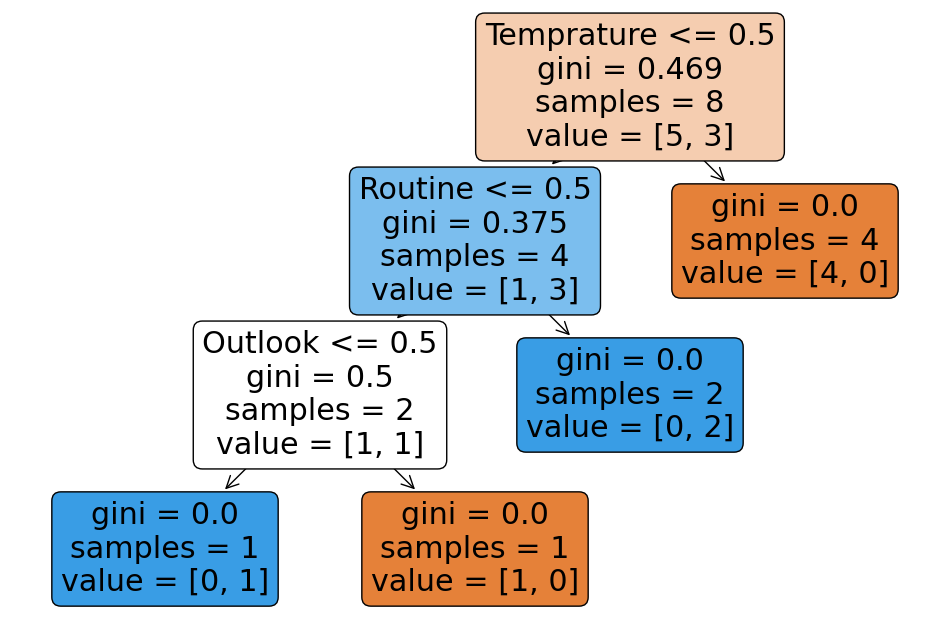

In [17]:
plt.figure(figsize=(12, 8))
tree.plot_tree(ds_classifier, rounded=True, filled=True, feature_names=train_data.columns)
plt.show()

In [18]:
text_rep = tree.export_text(ds_classifier)
print(text_rep)

|--- feature_1 <= 0.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- class: 1
|--- feature_1 >  0.50
|   |--- class: 0



In [19]:
pred=ds_classifier.predict([[1,0,1]])
my_pred=pred.astype(bool)
print(my_pred)

[ True]
